In [87]:
import pandas as pd
import matplotlib.pyplot as plt 
from matplotlib import rcParams
import seaborn as sns

%matplotlib inline

In [88]:
review_dataset = pd.read_csv("employee_review_mturk_dataset_v10_kaggle.csv")

In [89]:
review_dataset.columns

Index(['id', 'person_name', 'nine_box_category', 'feedback', 'adjusted',
       'reviewed'],
      dtype='object')

In [90]:
review_dataset.head(2)

,id,person_name,nine_box_category,feedback,adjusted,reviewed
0,1,John Doe,"Category 1: 'Risk' (Low performance, Low poten...",John has not progressed in his position. He is...,False,True
1,2,John Doe,"Category 1: 'Risk' (Low performance, Low poten...",John has consistently disappointed me this qua...,False,True


In [91]:
# review_dataset[['Performance Category','Potential Category']] = review_dataset['nine_box_category'].str.split(',', expand=True)

In [92]:
review_dataset.head(2)

,id,person_name,nine_box_category,feedback,adjusted,reviewed
0,1,John Doe,"Category 1: 'Risk' (Low performance, Low poten...",John has not progressed in his position. He is...,False,True
1,2,John Doe,"Category 1: 'Risk' (Low performance, Low poten...",John has consistently disappointed me this qua...,False,True


In [93]:
review_dataset['Overall Performance Category'] = review_dataset['nine_box_category'].str.replace(r"(\s*\(.*?\)\s*)", " ").str.strip()

C:\Users\Simran Yesukumar\AppData\Local\Temp\ipykernel_5116\2358278595.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  review_dataset['Overall Performance Category'] = review_dataset['nine_box_category'].str.replace(r"(\s*\(.*?\)\s*)", " ").str.strip()


In [94]:
review_dataset['Performance Category'] = review_dataset['nine_box_category'].str.extract('.*\((.*)\).*')

In [95]:
review_dataset[['Performance Category','Potential Category']] = review_dataset['Performance Category'].str.split(',', expand=True)

In [96]:
review_dataset.head(2)

,id,person_name,nine_box_category,feedback,adjusted,reviewed,Overall Performance Category,Performance Category,Potential Category
0,1,John Doe,"Category 1: 'Risk' (Low performance, Low poten...",John has not progressed in his position. He is...,False,True,Category 1: 'Risk',Low performance,Low potential
1,2,John Doe,"Category 1: 'Risk' (Low performance, Low poten...",John has consistently disappointed me this qua...,False,True,Category 1: 'Risk',Low performance,Low potential


In [97]:
review_dataset.columns

Index(['id', 'person_name', 'nine_box_category', 'feedback', 'adjusted',
       'reviewed', 'Overall Performance Category', 'Performance Category',
       'Potential Category'],
      dtype='object')

In [98]:
review_dataset = review_dataset[['id', 'person_name', 'feedback','Overall Performance Category', 'Performance Category',
       'Potential Category']]

In [99]:
review_dataset.isna().sum()

id                              0
person_name                     0
feedback                        0
Overall Performance Category    0
Performance Category            0
Potential Category              0
dtype: int64

In [100]:
review_dataset.head()

,id,person_name,feedback,Overall Performance Category,Performance Category,Potential Category
0,1,John Doe,John has not progressed in his position. He is...,Category 1: 'Risk',Low performance,Low potential
1,2,John Doe,John has consistently disappointed me this qua...,Category 1: 'Risk',Low performance,Low potential
2,3,John Doe,John turned in subpar work product all quarter...,Category 1: 'Risk',Low performance,Low potential
3,6,John Doe,John Doe demonstrates a low level of knowledge...,Category 1: 'Risk',Low performance,Low potential
4,7,George Gill,George gill's performance is really poor. He d...,Category 1: 'Risk',Low performance,Low potential


In [101]:
#Number of employees in each Performance Category
overall_performance = review_dataset.groupby(['Overall Performance Category'])['id'].nunique().reset_index()

In [102]:
overall_performance

,Overall Performance Category,id
0,Category 1: 'Risk',126
1,Category 2: 'Average performer',106
2,Category 3: 'Solid Performer',89
3,Category 4: 'Inconsistent Player',113
4,Category 5: 'Core Player',112
5,Category 6: 'High Performer',91
6,Category 7: 'Potential Gem',41
7,Category 8: 'High Potential',88
8,Category 9: 'Star',112


<Figure size 576x432 with 0 Axes>

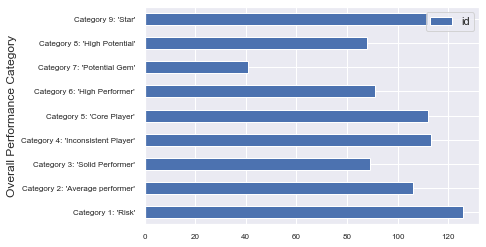

In [103]:
overall_performance = review_dataset.groupby(['Overall Performance Category'])['id'].nunique().reset_index()
plt.figure(figsize= (8, 6))
overall_performance.plot(x="Overall Performance Category", y="id", kind="barh", fontsize=8)
plt.show()

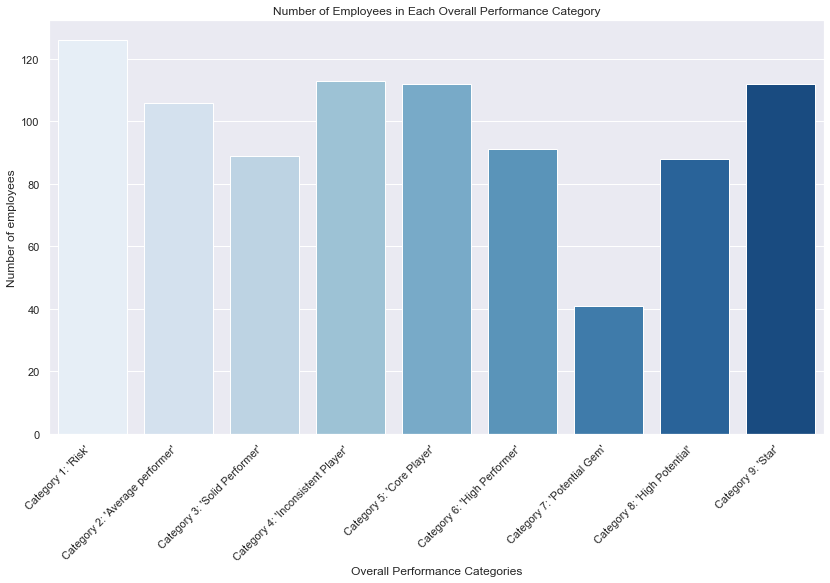

In [104]:
import seaborn as sns
# sns.set_theme(style="whitegrid")
sns.set_theme(rc={'figure.figsize':(11.7,8.27)})
# sns.set(font_scale=1)
ax = sns.barplot(x="Overall Performance Category", y="id", palette='Blues',data=overall_performance)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.set_title('Number of Employees in Each Overall Performance Category')
ax.set(xlabel='Overall Performance Categories', ylabel='Number of employees')
plt.tight_layout()
plt.show()

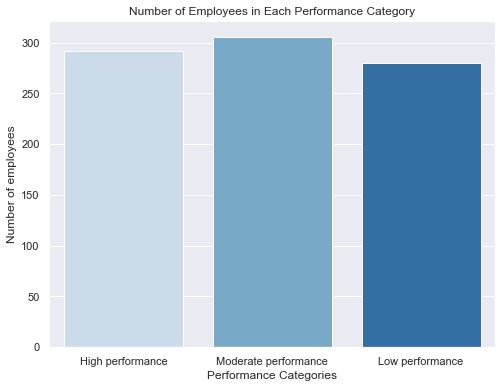

In [105]:
performance = review_dataset.groupby(['Performance Category'])['id'].nunique().reset_index()
# print(performance)
# performance['Performance Category'] = pd.Categorical(performance['Performance Category'], ["High Performance", "Moderate Performance", "Low Performance"])
# print(performance)
# performance = performance.sort_values("Performance Category")
performance = performance.reindex([0, 2, 1])
# sns.set_theme(style="whitegrid")
sns.set_theme(rc={'figure.figsize':(8,6)})
# sns.set(font_scale=1)
ax = sns.barplot(x="Performance Category", y="id", palette='Blues',data=performance)
# ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.set_title('Number of Employees in Each Performance Category')
ax.set(xlabel='Performance Categories', ylabel='Number of employees')
# plt.tight_layout()
plt.show()

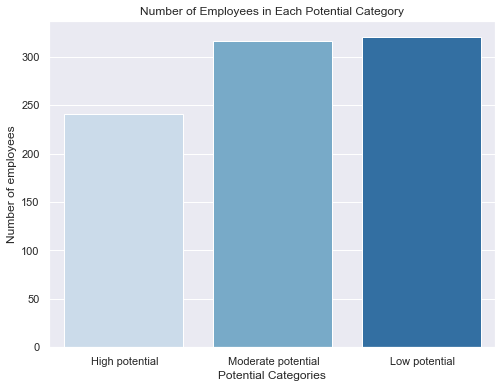

In [106]:
potential = review_dataset.groupby(['Potential Category'])['id'].nunique().reset_index()
# print(potential)
# performance['Performance Category'] = pd.Categorical(performance['Performance Category'], ["High Performance", "Moderate Performance", "Low Performance"])
# print(performance)
# performance = performance.sort_values("Performance Category")
potential = potential.reindex([0, 2, 1])
# sns.set_theme(style="whitegrid")
sns.set_theme(rc={'figure.figsize':(8,6)})
# sns.set(font_scale=1)
ax = sns.barplot(x="Potential Category", y="id", palette='Blues',data=potential)
# ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.set_title('Number of Employees in Each Potential Category')
ax.set(xlabel='Potential Categories', ylabel='Number of employees')
# plt.tight_layout()
plt.show()

In [107]:
review_dataset.head(2)

,id,person_name,feedback,Overall Performance Category,Performance Category,Potential Category
0,1,John Doe,John has not progressed in his position. He is...,Category 1: 'Risk',Low performance,Low potential
1,2,John Doe,John has consistently disappointed me this qua...,Category 1: 'Risk',Low performance,Low potential


# BART Summarization

In [108]:
# !pip install --ignore-installed torch --user
# !pip install torch
# !pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118
# !pip install bert-extractive-summarizer
# !pip install transformers 
# !pip install bert-extractive-summarizer

In [109]:
from transformers import pipeline

In [110]:
summarizer = pipeline("summarization", model="facebook/bart-large-cnn")

In [111]:
review_dataset_new = review_dataset.head(5)

In [112]:
def summarize_text(text):
    summary = summarizer(text, max_length=50, min_length=25, do_sample=False)
    return summary[0]['summary_text']

In [113]:
review_dataset_new['summary'] = review_dataset_new['feedback'].apply(summarize_text)

Your max_length is set to 50, but your input_length is only 37. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=18)
Your max_length is set to 50, but your input_length is only 32. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=16)
C:\Users\Simran Yesukumar\AppData\Local\Temp\ipykernel_5116\1563702601.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  review_dataset_new['summary'] = review_dataset_new['feedback'].apply(summarize_text)


In [114]:
review_dataset_new['feedback'].unique()

array(["John has not progressed in his position. He is continuously late, leaves early, and takes many breaks throughout the day. He calls out at least every other week and it's always on Fridays. His performance has significantly declined. My suggestion is he is not suitable for this position.",
       'John has consistently disappointed me this quarter with his shoddy work product. I asked him for a report and gave him a lenient two-week deadline, but he blew past that deadline without even informing me. When he finally turned the report in, it was three weeks late and riddled with typos. He did not seem interested in any of the comments that I made on that report, even though I made them for his benefit so he would understand what a high-quality report is supposed to look like.',
       "John turned in subpar work product all quarter. When I asked him to make revisions, he repeatedly failed to implement the corrections that I had requested. He also seemed confused and lost whenever 

In [115]:
review_dataset_new['summary'].unique()

array(['"John has not progressed in his position. He is continuously late, leaves early, and takes many breaks throughout the day. His performance has significantly declined"',
       '"I asked him for a report and gave him a lenient two-week deadline, but he blew past that deadline without even informing me," he says. "When he finally turned the report in, it was three weeks late and',
       '"He seems to have already reached his full potential here," says CEO. "He turned in subpar work product all quarter," he adds.',
       'John Doe demonstrates a low level of knowledge of the required work procedures. His work does not comply with the required output standards. He is reluctant to take on new responsibilities.',
       "George Gill's performance is really poor. He does not concentrates in his job. He shows zero involvement in the works he does."],
      dtype=object)

# BERT Summarization 

In [116]:
# !pip install bert-extractive-summarizer

In [117]:
from summarizer import Summarizer,TransformerSummarizer
bert_model = Summarizer()

In [118]:
summary=[]
for x in review_dataset_new.id.unique():
    docs=review_dataset_new[review_dataset_new['id']==x]['feedback'].str.lower()
    docs=''.join(docs)
    print(docs)
    
    result= bert_model(docs,num_sentences=1,min_length=20)
    summary.append(result)

full_summary=pd.DataFrame()
for i in range(len(summary)):
    new=pd.Series({'Id':review_dataset_new.id.unique()[i],'Summary':summary[i]})
    full_summary=full_summary.append(new,ignore_index=True)
    
full_summary

john has not progressed in his position. he is continuously late, leaves early, and takes many breaks throughout the day. he calls out at least every other week and it's always on fridays. his performance has significantly declined. my suggestion is he is not suitable for this position.
john has consistently disappointed me this quarter with his shoddy work product. i asked him for a report and gave him a lenient two-week deadline, but he blew past that deadline without even informing me. when he finally turned the report in, it was three weeks late and riddled with typos. he did not seem interested in any of the comments that i made on that report, even though i made them for his benefit so he would understand what a high-quality report is supposed to look like.
john turned in subpar work product all quarter. when i asked him to make revisions, he repeatedly failed to implement the corrections that i had requested. he also seemed confused and lost whenever we had discussions about the

C:\Users\Simran Yesukumar\AppData\Local\Temp\ipykernel_5116\2769117368.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  full_summary=full_summary.append(new,ignore_index=True)
C:\Users\Simran Yesukumar\AppData\Local\Temp\ipykernel_5116\2769117368.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  full_summary=full_summary.append(new,ignore_index=True)
C:\Users\Simran Yesukumar\AppData\Local\Temp\ipykernel_5116\2769117368.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  full_summary=full_summary.append(new,ignore_index=True)
C:\Users\Simran Yesukumar\AppData\Local\Temp\ipykernel_5116\2769117368.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

,Id,Summary
0,1,john has not progressed in his position.
1,2,john has consistently disappointed me this qua...
2,3,john turned in subpar work product all quarter.
3,6,john doe demonstrates a low level of knowledge...
4,7,george gill's performance is really poor.


In [119]:
full_summary=pd.DataFrame()
for i in range(len(summary)):
    new=pd.Series({'Id':review_dataset_new.id.unique()[i],'Summary':summary[i]})
    full_summary=full_summary.append(new,ignore_index=True)
    
full_summary

C:\Users\Simran Yesukumar\AppData\Local\Temp\ipykernel_5116\3341931558.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  full_summary=full_summary.append(new,ignore_index=True)
C:\Users\Simran Yesukumar\AppData\Local\Temp\ipykernel_5116\3341931558.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  full_summary=full_summary.append(new,ignore_index=True)
C:\Users\Simran Yesukumar\AppData\Local\Temp\ipykernel_5116\3341931558.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  full_summary=full_summary.append(new,ignore_index=True)
C:\Users\Simran Yesukumar\AppData\Local\Temp\ipykernel_5116\3341931558.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

,Id,Summary
0,1,john has not progressed in his position.
1,2,john has consistently disappointed me this qua...
2,3,john turned in subpar work product all quarter.
3,6,john doe demonstrates a low level of knowledge...
4,7,george gill's performance is really poor.


In [120]:
review_dataset_new['feedback'].unique()

array(["John has not progressed in his position. He is continuously late, leaves early, and takes many breaks throughout the day. He calls out at least every other week and it's always on Fridays. His performance has significantly declined. My suggestion is he is not suitable for this position.",
       'John has consistently disappointed me this quarter with his shoddy work product. I asked him for a report and gave him a lenient two-week deadline, but he blew past that deadline without even informing me. When he finally turned the report in, it was three weeks late and riddled with typos. He did not seem interested in any of the comments that I made on that report, even though I made them for his benefit so he would understand what a high-quality report is supposed to look like.',
       "John turned in subpar work product all quarter. When I asked him to make revisions, he repeatedly failed to implement the corrections that I had requested. He also seemed confused and lost whenever 

In [121]:
full_summary['Summary'].unique()

array(['john has not progressed in his position.',
       'john has consistently disappointed me this quarter with his shoddy work product.',
       'john turned in subpar work product all quarter.',
       'john doe demonstrates a low level of knowledge of the required work procedures and his work does not comply with the required output standards.',
       "george gill's performance is really poor."], dtype=object)

# BERT summarization - new reviews dataset

In [122]:
import pandas as pd

# Data for the performance reviews
new_review_data = {
    "Employee Name": ["John Smith", "Emily Davis", "Michael Brown", "Sophia Johnson", "David Lee"],
    "Performance Review": [
        """1. Work Quality: John consistently delivers high-quality work with attention to detail. His projects often exceed expectations in terms of accuracy and creativity.
2. Timeliness: He completes tasks within deadlines, even when faced with tight schedules. His time management skills are commendable.
3. Team Collaboration: John is an excellent team player. He contributes effectively in team meetings and is always willing to help colleagues.
4. Communication: His communication skills are strong, both in written and verbal forms. John is clear and concise in his reports and presentations.
5. Initiative: He often takes the initiative to suggest improvements in workflows and processes. His proactive approach is a valuable asset to the team.
6. Learning & Development: John actively seeks out opportunities for professional development and applies new skills to his work.
7. Problem Solving: He demonstrates strong problem-solving abilities, often coming up with innovative solutions to complex issues.
8. Punctuality: John is punctual and adheres to company policies regarding work hours and attendance.
9. Areas for Improvement: He could benefit from delegating tasks more effectively to avoid burnout.
10. Overall Performance: John is a highly reliable and efficient employee, contributing significantly to the team's success.""",
        """1. Work Quality: Emily produces excellent work with a high degree of accuracy. Her attention to detail ensures minimal errors in her deliverables.
2. Timeliness: She meets deadlines consistently and often completes tasks ahead of schedule. Emily’s time management is exemplary.
3. Team Collaboration: Emily is a collaborative team member who supports and respects her colleagues. She excels in team environments.
4. Communication: Her communication skills are strong, but she could work on being more assertive in group discussions.
5. Initiative: Emily shows a good level of initiative and often volunteers for additional responsibilities.
6. Learning & Development: She has demonstrated a willingness to learn new skills and has attended several training sessions.
7. Problem Solving: Emily approaches problems methodically and often finds effective solutions. Her analytical skills are an asset.
8. Punctuality: Emily maintains a high standard of punctuality and is reliable in her attendance.
9. Areas for Improvement: Developing more confidence in her decision-making could enhance her overall performance.
10. Overall Performance: Emily is a valuable team member with a solid performance record and a positive attitude.""",
        """1. Work Quality: Michael’s work is consistently thorough and accurate, with a strong emphasis on quality.
2. Timeliness: He has a track record of meeting deadlines, though occasionally he may require reminders to complete tasks.
3. Team Collaboration: Michael is a cooperative team member and provides constructive feedback to his peers.
4. Communication: He communicates effectively but could benefit from more frequent updates on project progress.
5. Initiative: Michael shows initiative in identifying areas for improvement and is eager to take on new challenges.
6. Learning & Development: He is proactive in pursuing additional training and improving his skill set.
7. Problem Solving: Michael is adept at analyzing problems and finding practical solutions quickly.
8. Punctuality: Generally punctual, though he has occasionally arrived late due to personal commitments.
9. Areas for Improvement: More consistent communication regarding project updates would enhance team alignment.
10. Overall Performance: Michael is a dedicated employee who consistently delivers quality work and supports his team effectively.""",
        """1. Work Quality: Sophia’s work is precise and meets all required standards. Her attention to detail is a significant strength.
2. Timeliness: She consistently meets deadlines and manages her time effectively, even with a heavy workload.
3. Team Collaboration: Sophia is highly collaborative and works well with diverse teams, contributing positively to group dynamics.
4. Communication: Her communication is clear and effective, though she could work on providing more regular status updates.
5. Initiative: Sophia takes initiative to streamline processes and improve efficiency in her role.
6. Learning & Development: She shows a strong commitment to her professional growth by attending workshops and training sessions.
7. Problem Solving: Sophia effectively tackles challenges and finds innovative solutions to complex problems.
8. Punctuality: Always punctual and adheres to the company’s attendance policies without fail.
9. Areas for Improvement: Providing more frequent feedback to her team members could enhance their development.
10. Overall Performance: Sophia is a strong performer who consistently delivers high-quality work and contributes positively to the team.""",
        """1. Work Quality: David consistently delivers work of high quality, demonstrating excellent technical skills.
2. Timeliness: He manages to meet tight deadlines but occasionally struggles with balancing multiple priorities.
3. Team Collaboration: David is a supportive team member who collaborates effectively with colleagues across departments.
4. Communication: His communication is generally good, but he could benefit from being more proactive in team discussions.
5. Initiative: David shows initiative in suggesting new ideas and improving existing processes.
6. Learning & Development: He actively seeks opportunities for learning and applies new knowledge effectively in his role.
7. Problem Solving: David excels in identifying problems early and developing creative solutions.
8. Punctuality: Maintains excellent punctuality and rarely takes unplanned leave.
9. Areas for Improvement: Improving his multitasking abilities could help him manage competing priorities more effectively.
10. Overall Performance: David is a dependable employee with strong technical skills and a proactive approach to his work."""
    ]
}

# Create DataFrame
new_review_data = pd.DataFrame(new_review_data)

In [123]:
# new_review_data

In [124]:
summary_bert=[]
for x in new_review_data['Employee Name'].unique():
    docs=new_review_data[new_review_data['Employee Name']==x]['Performance Review'].str.lower()
    docs=''.join(docs)
#     print(docs)
    
    result= bert_model(docs,num_sentences=3,min_length=30)
    summary_bert.append(result)

summary_generated_bert_performance_review=pd.DataFrame()
for i in range(len(summary_bert)):
    new=pd.Series({'Id':new_review_data['Employee Name'].unique()[i],'Performance Review':summary_bert[i]})
    summary_generated_bert_performance_review=summary_generated_bert_performance_review.append(new,ignore_index=True)
    
summary_generated_bert_performance_review

C:\Users\Simran Yesukumar\AppData\Local\Temp\ipykernel_5116\4002044894.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary_generated_bert_performance_review=summary_generated_bert_performance_review.append(new,ignore_index=True)
C:\Users\Simran Yesukumar\AppData\Local\Temp\ipykernel_5116\4002044894.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary_generated_bert_performance_review=summary_generated_bert_performance_review.append(new,ignore_index=True)
C:\Users\Simran Yesukumar\AppData\Local\Temp\ipykernel_5116\4002044894.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary_generated_bert_performance_review=summary_generated_bert_performance_review.append(new,ignore_index=True)
C:\Users\Simran Yes

,Id,Performance Review
0,John Smith,work quality: john consistently delivers high-...
1,Emily Davis,work quality: emily produces excellent work wi...
2,Michael Brown,work quality: michael’s work is consistently t...
3,Sophia Johnson,work quality: sophia’s work is precise and mee...
4,David Lee,work quality: david consistently delivers work...


# Using GPT2 Model to summarize Performance Reviews

In [125]:
GPT2_model = TransformerSummarizer(transformer_type="GPT2",transformer_model_key="gpt2-medium")

In [126]:
summary_generate_gpt2=[]
for x in new_review_data['Employee Name'].unique():
    docs=new_review_data[new_review_data['Employee Name']==x]['Performance Review'].str.lower()
    docs=''.join(docs)
#     print(docs)
    
    result= GPT2_model(docs,num_sentences=3,min_length=30)
    summary_generate_gpt2.append(result)

summary_generated_gp2_performance_review=pd.DataFrame()
for i in range(len(summary_generate_gpt2)):
    new=pd.Series({'Id':new_review_data['Employee Name'].unique()[i],'Performance Review':summary_generate_gpt2[i]})
    summary_generated_gp2_performance_review=summary_generated_gp2_performance_review.append(new,ignore_index=True)
    
summary_generated_gp2_performance_review

C:\Users\Simran Yesukumar\AppData\Local\Temp\ipykernel_5116\2694317152.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary_generated_gp2_performance_review=summary_generated_gp2_performance_review.append(new,ignore_index=True)
C:\Users\Simran Yesukumar\AppData\Local\Temp\ipykernel_5116\2694317152.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary_generated_gp2_performance_review=summary_generated_gp2_performance_review.append(new,ignore_index=True)
C:\Users\Simran Yesukumar\AppData\Local\Temp\ipykernel_5116\2694317152.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary_generated_gp2_performance_review=summary_generated_gp2_performance_review.append(new,ignore_index=True)
C:\Users\Simran Yesukumar

,Id,Performance Review
0,John Smith,work quality: john consistently delivers high-...
1,Emily Davis,work quality: emily produces excellent work wi...
2,Michael Brown,work quality: michael’s work is consistently t...
3,Sophia Johnson,work quality: sophia’s work is precise and mee...
4,David Lee,work quality: david consistently delivers work...


# Using GPT2 Model to summarize employee's Self Check-in comments

In [138]:
import pandas as pd

# Data for the self check-in comments
data = {
    "Employee Name": ["John Smith", "Emily Davis", "Michael Brown", "Sophia Johnson", "David Lee"],
    "Performance Reviews": [
        "Over the past quarter, I feel I’ve made significant strides in delivering high-quality work and maintaining attention to detail. I’ve managed to meet deadlines consistently, even when the workload was heavy, which I attribute to better time management practices I’ve adopted. Participating in team meetings has been a great way for me to share my ideas and get valuable feedback, and I believe my contributions have been well-received. I’ve worked on improving my communication skills, ensuring that my updates and reports are clear and concise. Taking the initiative to suggest process improvements has been rewarding, and I’m proud of the positive changes implemented as a result. I’ve also focused on my professional development by attending several training sessions, which have equipped me with new skills I’ve already started applying. Problem-solving remains a strong suit of mine, and I’ve enjoyed tackling some of the more complex challenges we’ve faced. My punctuality has been excellent, and I’ve been able to maintain a good work-life balance without affecting my attendance. One area I recognize I need to improve on is delegating tasks more effectively to avoid overburdening myself. I’ve taken steps to mentor junior team members, and I’m seeing positive results from this. Volunteering for challenging tasks has helped me grow and learn, and I’m keen to continue this approach. I’ve maintained a positive attitude even during high-pressure situations and have found that being adaptable to change has greatly benefited my work. I’m pleased with the progress I’ve made in aligning with both technical and strategic goals. Streamlining our reporting processes was a significant achievement, saving time and increasing efficiency. Seeking feedback has been crucial, and I’ve made a concerted effort to incorporate it into my daily work. I believe my work ethic and motivation have had a positive influence on the team. Overall, I’m proud of my contributions and look forward to continuing to excel and support the team.",
        "Reflecting on the past quarter, I feel that I’ve achieved a lot in terms of project quality and meeting expectations. My attention to detail has ensured that my work is accurate and often exceeds what is required. I’ve been successful in managing my time, consistently meeting deadlines without compromising the quality of my deliverables. Working collaboratively with my colleagues has been a highlight, and I believe my supportive nature has helped our team work more effectively together. Communication has been a key focus for me, and I’ve worked on being clearer and more assertive in discussions and updates. I’ve shown initiative by volunteering for additional responsibilities and proposing ideas to improve our workflows. I’ve actively pursued professional development opportunities, including several training sessions that have enhanced my skills. My approach to problem-solving has been methodical, allowing me to find effective solutions to challenges we’ve encountered. I’ve maintained high standards of punctuality and reliability, which I think has positively impacted the team’s productivity. Confidence in decision-making is an area I’m working on, and I’ve been seeking more feedback to help build this. I’m proud of the way I’ve handled multiple tasks and my ability to stay organized under pressure. I’ve volunteered for several projects that have pushed me out of my comfort zone, which has been a valuable learning experience. Adapting to new processes and requirements has been a challenge I’ve met with a positive attitude. I believe my understanding of both technical and team dynamics has improved significantly. My recent suggestion to optimize our document management system has been well-received and implemented. I’m committed to seeking continuous feedback and using it to improve my performance. Overall, I feel that my dedication and effort have contributed positively to our team’s success, and I’m eager to keep growing and supporting my colleagues.",
        "Looking back on this quarter, I’m pleased with my performance in terms of the quality and accuracy of my work. I’ve been able to meet deadlines reliably, although balancing multiple projects has sometimes required me to be more mindful of my time management. I’ve made a conscious effort to contribute constructively during team meetings and to provide helpful feedback to my peers. My communication has been generally effective, but I recognize the need to keep the team more regularly updated on my progress. I’ve taken the initiative to identify areas where we can improve and have proposed several changes that have been positively received. I’ve engaged in additional training to enhance my skills, which has been beneficial for my role. Problem-solving continues to be a strong area for me, and I’ve enjoyed finding solutions to some of the more complex issues we’ve faced. Punctuality has been good overall, though I’ve had to manage some personal commitments that affected my schedule slightly. Improving the consistency of my communication, particularly regarding project updates, is a priority for me. I’m proud of my contributions to team projects and the way I’ve supported my colleagues. Volunteering for tasks outside my usual responsibilities has been a great way to learn and grow. I’ve maintained a positive attitude, even when faced with changing project demands. I’ve gained a better understanding of both the technical aspects of my work and the broader strategic goals of the team. My suggestion to enhance our feedback loop has been implemented and has improved our workflow. Seeking feedback and using it to refine my approach has been a key focus for me. I believe my work ethic and dedication have positively influenced the team. Overall, I’m proud of the progress I’ve made and look forward to continuing to contribute to our team’s success.",
        "Over the past quarter, I’ve been dedicated to delivering precise and high-quality work, and I feel I’ve met the required standards consistently. Time management has been a strength, allowing me to handle a heavy workload while still meeting deadlines. Collaboration with diverse teams has been rewarding, and I believe I’ve positively contributed to group dynamics. I’ve focused on clear and effective communication, though I’ve identified the need to provide more regular status updates to improve coordination. Taking the initiative to streamline processes has been a priority, and I’ve seen positive results from the changes implemented. I’ve attended several workshops and training sessions to support my professional growth, which I’ve found highly beneficial. Problem-solving has been an area where I’ve excelled, often finding innovative solutions to complex challenges. My punctuality has been excellent, and I’ve adhered to company policies regarding attendance without fail. Providing more frequent feedback to team members is something I’m working on to enhance my leadership capabilities. I’m proud of my ability to handle various responsibilities and adapt to new processes. Volunteering for new and challenging tasks has helped me learn and expand my skills. I’ve maintained a positive attitude and resilience in the face of changing project requirements. I’ve improved my understanding of both technical and strategic elements of my role. My suggestion to improve our task tracking system has been successfully implemented, saving the team time. Seeking feedback from colleagues and incorporating it into my work has been a valuable practice. I believe my work ethic and willingness to support others have had a positive impact. Overall, I’m satisfied with my contributions and look forward to continuing to develop my skills and support the team.",
        "Reflecting on this quarter, I’m proud of the high-quality work I’ve delivered and the technical skills I’ve demonstrated. Managing tight deadlines has been challenging but I’ve been able to meet them reliably. Balancing multiple priorities has been an area of focus for me, and I’ve developed strategies to manage my time more effectively. I’ve worked collaboratively with colleagues across departments, which has enhanced my understanding of different aspects of our work. My communication has been generally effective, though I plan to be more proactive in team discussions moving forward. I’ve taken the initiative to suggest improvements to existing processes and have seen positive feedback on these ideas. Engaging in learning opportunities and applying new knowledge has been beneficial for my role. Problem-solving is a strong suit of mine, and I’ve enjoyed developing creative solutions to issues we’ve encountered. My punctuality has been excellent, and I’ve maintained a reliable attendance record. Improving my multitasking abilities is an area I’m focusing on to manage competing priorities better. Volunteering for challenging projects has been a great learning experience and has helped me grow. I’ve maintained a positive attitude and adaptability, even when faced with changing project requirements. My understanding of both technical and strategic goals has deepened over the past quarter. My suggestion to optimize our resource allocation process has been implemented and has improved efficiency. Seeking and acting on feedback has been a priority for me, and I’ve seen positive results. I believe my dedication and proactive approach have contributed positively to the team. Overall, I’m pleased with my progress and am committed to continuing to support our team and enhance my skills."
    ]
}

# Create DataFrame
new_reviews_comments_2 = pd.DataFrame(data)
GPT2_model = TransformerSummarizer(transformer_type="GPT2",transformer_model_key="gpt2-medium")

In [139]:
summary=[]
for x in new_reviews_comments_2['Employee Name'].unique():
    docs=new_reviews_comments_2[new_reviews_comments_2['Employee Name']==x]['Performance Reviews'].str.lower()
    docs=''.join(docs)
#     print(docs)
    
    result= GPT2_model(docs,num_sentences=3,min_length=30)
    summary.append(result)

full_summary=pd.DataFrame()
for i in range(len(summary)):
    new=pd.Series({'Id':new_reviews_comments_2['Employee Name'].unique()[i],'Performance Reviews':summary[i]})
    full_summary=full_summary.append(new,ignore_index=True)
    
full_summary

C:\Users\Simran Yesukumar\AppData\Local\Temp\ipykernel_5116\1187538795.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  full_summary=full_summary.append(new,ignore_index=True)
C:\Users\Simran Yesukumar\AppData\Local\Temp\ipykernel_5116\1187538795.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  full_summary=full_summary.append(new,ignore_index=True)
C:\Users\Simran Yesukumar\AppData\Local\Temp\ipykernel_5116\1187538795.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  full_summary=full_summary.append(new,ignore_index=True)
C:\Users\Simran Yesukumar\AppData\Local\Temp\ipykernel_5116\1187538795.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

,Id,Performance Reviews
0,John Smith,"over the past quarter, i feel i’ve made signif..."
1,Emily Davis,"reflecting on the past quarter, i feel that i’..."
2,Michael Brown,"looking back on this quarter, i’m pleased with..."
3,Sophia Johnson,"over the past quarter, i’ve been dedicated to ..."
4,David Lee,"reflecting on this quarter, i’m proud of the h..."


In [140]:
full_summary['Performance Reviews'].unique()

array(['over the past quarter, i feel i’ve made significant strides in delivering high-quality work and maintaining attention to detail. i’ve managed to meet deadlines consistently, even when the workload was heavy, which i attribute to better time management practices i’ve adopted. streamlining our reporting processes was a significant achievement, saving time and increasing efficiency.',
       'reflecting on the past quarter, i feel that i’ve achieved a lot in terms of project quality and meeting expectations. i’ve been successful in managing my time, consistently meeting deadlines without compromising the quality of my deliverables. my recent suggestion to optimize our document management system has been well-received and implemented.',
       'looking back on this quarter, i’m pleased with my performance in terms of the quality and accuracy of my work. i’ve made a conscious effort to contribute constructively during team meetings and to provide helpful feedback to my peers. seekin

In [141]:
new_reviews_comments_2['Performance Reviews'].unique()

array(['Over the past quarter, I feel I’ve made significant strides in delivering high-quality work and maintaining attention to detail. I’ve managed to meet deadlines consistently, even when the workload was heavy, which I attribute to better time management practices I’ve adopted. Participating in team meetings has been a great way for me to share my ideas and get valuable feedback, and I believe my contributions have been well-received. I’ve worked on improving my communication skills, ensuring that my updates and reports are clear and concise. Taking the initiative to suggest process improvements has been rewarding, and I’m proud of the positive changes implemented as a result. I’ve also focused on my professional development by attending several training sessions, which have equipped me with new skills I’ve already started applying. Problem-solving remains a strong suit of mine, and I’ve enjoyed tackling some of the more complex challenges we’ve faced. My punctuality has been exce